In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [14]:
# Download Emirates data from Yahoo Finance
data = yf.download("EMIRATESNBD.AE", start="2015-01-01", end="2023-08-31")
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-04,8.545357,8.545357,7.834045,8.055128,5.448619,180410
2015-01-05,8.055128,8.055128,7.449552,7.689860,5.201546,359105
2015-01-06,7.689860,7.834045,7.680247,7.689860,5.201546,914470
2015-01-07,7.689860,7.737921,7.593736,7.689860,5.201546,4124396
2015-01-08,8.026291,8.026291,7.680247,7.978230,5.396604,5209953


In [15]:
#Strategy1
data['Strategy1'] = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)
data.head()


,Open,High,Low,Close,Adj Close,Volume,Strategy1
Date,,,,,,,
2015-01-04,8.545357,8.545357,7.834045,8.055128,5.448619,180410,-1
2015-01-05,8.055128,8.055128,7.449552,7.689860,5.201546,359105,-1
2015-01-06,7.689860,7.834045,7.680247,7.689860,5.201546,914470,-1
2015-01-07,7.689860,7.737921,7.593736,7.689860,5.201546,4124396,1
2015-01-08,8.026291,8.026291,7.680247,7.978230,5.396604,5209953,1


In [16]:
# Strategy 2
data['50MA'] = data['Close'].rolling(window=50).mean()
data['200MA'] = data['Close'].rolling(window=200).mean()
data['Strategy2'] = np.where(data['50MA'] > data['200MA'], 1, -1)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Strategy1,50MA,200MA,Strategy2
Date,,,,,,,,,,
2015-01-04,8.545357,8.545357,7.834045,8.055128,5.448619,180410,-1,NaN,NaN,-1
2015-01-05,8.055128,8.055128,7.449552,7.689860,5.201546,359105,-1,NaN,NaN,-1
2015-01-06,7.689860,7.834045,7.680247,7.689860,5.201546,914470,-1,NaN,NaN,-1
2015-01-07,7.689860,7.737921,7.593736,7.689860,5.201546,4124396,1,NaN,NaN,-1
2015-01-08,8.026291,8.026291,7.680247,7.978230,5.396604,5209953,1,NaN,NaN,-1


In [17]:
data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Strategy1,50MA,200MA,Strategy2
Date,,,,,,,,,,
2015-10-15,8.651092,8.651092,8.651092,8.651092,6.081089,0,1,8.811810,9.024675,-1
2015-10-18,8.651092,8.679929,8.651092,8.660705,6.087848,393245,-1,8.788933,9.027703,-1
2015-10-19,8.679929,8.679929,8.439621,8.458846,5.945955,3936755,-1,8.762019,9.031548,-1
2015-10-20,8.458846,8.458846,8.449233,8.458846,5.945955,1260657,-1,8.735104,9.035393,-1
2015-10-21,8.458846,8.458846,8.449233,8.458846,5.945955,1704621,1,8.708190,9.039238,-1


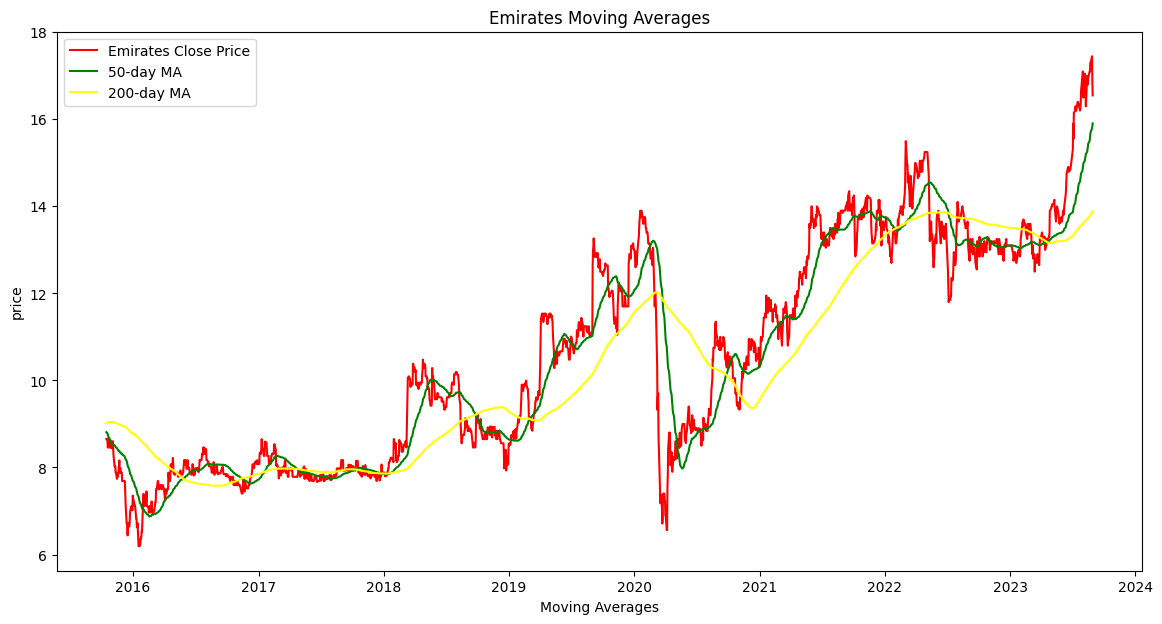

In [18]:
# plot moving averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Emirates Close Price', color='red')
plt.plot(data['50MA'], label='50-day MA', color = 'green')
plt.plot(data['200MA'], label='200-day MA', color= 'yellow')
plt.xlabel("Moving Averages")
plt.ylabel("price")
plt.legend()
plt.title('Emirates Moving Averages')
plt.show()

In [19]:
features = ['Open', 'High', 'Low', 'Close', '50MA', '200MA']
X = data[features].dropna()
y1 = data['Strategy1'].dropna()
y2 = data['Strategy2'].dropna()

In [20]:
# Initialize classifiers
models = [SVC(C=1,kernel='rbf',gamma=0.1,probability=True),KNeighborsClassifier(),GradientBoostingClassifier(),
          RandomForestClassifier(), XGBClassifier()]

In [21]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

# Model Training and Evaluation
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machines": SVC(),
    "XGBoost": XGBClassifier()
}

for name, clf in classifiers.items():
    # Training the classifier
    if name == "XGBoost":
      y_train1[y_train1 == -1]=0
      clf.fit(X_train1, y_train1)  # For Strategy 1 with modified y_train1
    else:
      clf.fit(X_train1, y_train1)  # For other classifiers

    # Making predictions
    y_pred1 = clf.predict(X_test1)  # For Strategy 1

    # Evaluating the classifier
    accuracy1 = accuracy_score(y_test1, y_pred1)  # For Strategy 1

    print(f"Classifier: {name}")
    print(f"Accuracy for Strategy 1: {accuracy1:.2f}")



Classifier: K-Nearest Neighbors
Accuracy for Strategy 1: 0.62
Classifier: Random Forest
Accuracy for Strategy 1: 0.64
Classifier: Gradient Boosting
Accuracy for Strategy 1: 0.63
Classifier: Support Vector Machines
Accuracy for Strategy 1: 0.66
Classifier: XGBoost
Accuracy for Strategy 1: 0.13


In [22]:
for name, clf in classifiers.items():
    # Training the classifier
    if name == "XGBoost":
      y_train2[y_train2 == -1]=0
      clf.fit(X_train2, y_train2)  # For Strategy 1 with modified y_train2
    else:
      clf.fit(X_train2, y_train2)  # For other classifiers

    # Making predictions
    y_pred2 = clf.predict(X_test2)  # For Strategy 2

    # Evaluating the classifier
    accuracy2 = accuracy_score(y_test2, y_pred2)  # For Strategy 2

    print(f"Classifier: {name}")
    print(f"Accuracy for Strategy 2: {accuracy2:.2f}")

Classifier: K-Nearest Neighbors
Accuracy for Strategy 2: 0.97
Classifier: Random Forest
Accuracy for Strategy 2: 0.99
Classifier: Gradient Boosting
Accuracy for Strategy 2: 0.99
Classifier: Support Vector Machines
Accuracy for Strategy 2: 0.94
Classifier: XGBoost
Accuracy for Strategy 2: 0.64


HYPER PARAMETERS

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for each classifier


param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}


# Define a dictionary of classifiers and their respective parameter grids
classifiers = {

    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), param_grid_gb),
    "Support Vector Machines": (SVC(random_state=42), param_grid_svc)
}

# Perform Grid Search and print the best parameters and accuracy for each classifier
for name, (clf, param_grid) in classifiers.items():
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
    grid_search.fit(X_train2, y_train2)

    # Making predictions
    y_pred2 = grid_search.predict(X_test2)  # For Strategy 1

    # Evaluating the classifier
    accuracy2 = accuracy_score(y_test2, y_pred2)  # For Strategy 1

    print(f"Classifier: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy for Strategy 1: {accuracy2:.2f}")

Classifier: Gradient Boosting
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Accuracy for Strategy 1: 0.64
Classifier: Support Vector Machines
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'poly'}
Accuracy for Strategy 1: 0.64
